# Predicting Housing Prices in Iowa
## My First Kaggle Competition- Final Score in the top 30%

House Prices: Advanced Regression Techniques <br> 
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Skills Shown:
> <font color='blue'>  Data Visualization </font> <br>
> <font color='green'> Machine Learning-Regression </font> <br>
> <font color='red'> Feature Engineering </font> <br>

My Profile:https://www.kaggle.com/bpunturo <br>
Kaggle Comp: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
#importing dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.base import TransformerMixin
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math
import scipy.stats as st
import xgboost
from xgboost import plot_importance
from sklearn.cross_validation import train_test_split

%matplotlib inline 
plt.style.use('ggplot')

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Reading in training data
train=pd.read_csv("train (1).csv")
train.shape

(1460, 81)

In [3]:
#Reading in test Data
official_test=pd.read_csv("test (1).csv")
official_test.shape


(1459, 80)

In [4]:
combined=pd.concat([train,official_test])

# Exploratory Data Analysis

In [5]:
combined.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [6]:
combined.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


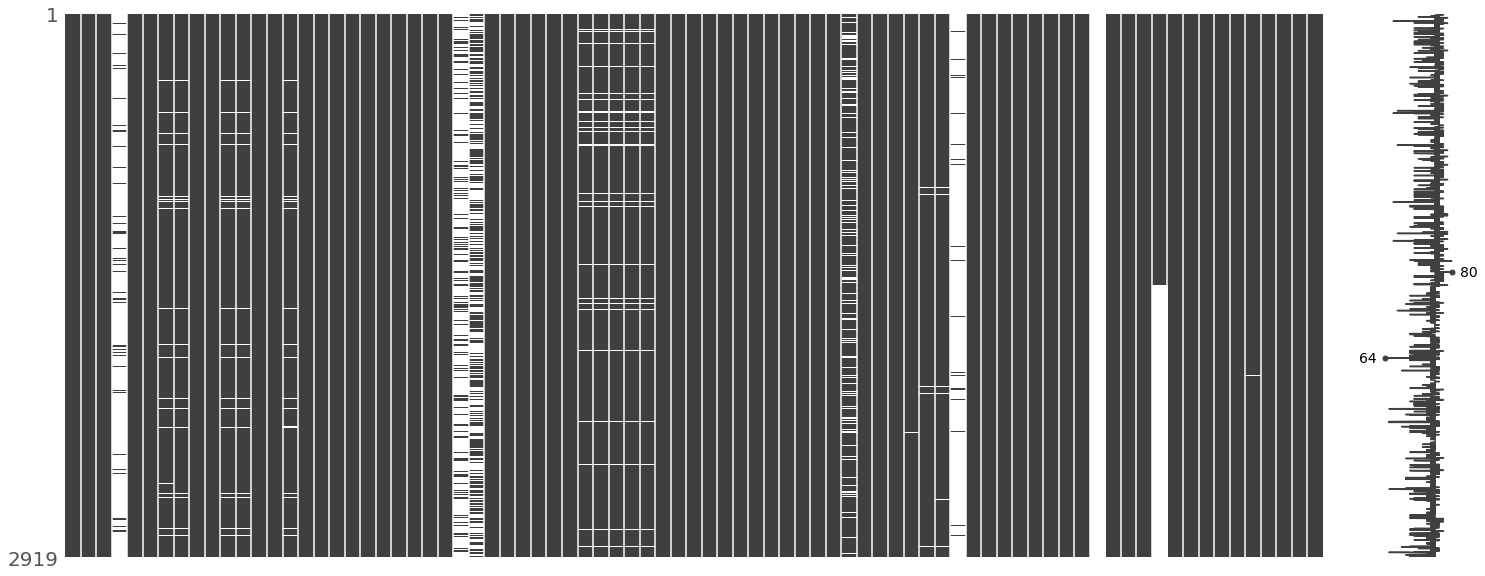

In [7]:
#Visualizing the missing data
msno.matrix(combined)

In [8]:
#Which columns have the most null values?
combined.isnull().sum().sort_values(ascending=False).head(n=20)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
dtype: int64

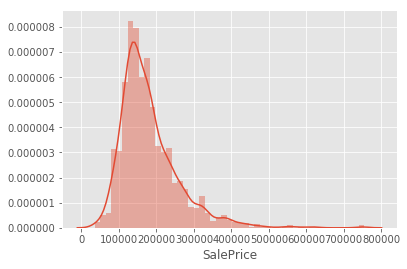

In [9]:
#What does the distribution of Sales Price look like?
sns.distplot(combined.SalePrice.dropna())

### SalePrice data looks to be Right-Skewed. Will need to logarithmically transform the data before attempting my regressions.

### Visualizing the relationships between all columns and salesprice

In [10]:
#Does Salesprice have linear relationships with other variables?
floats=[column for column in list(combined) if combined[column].dtypes==np.dtype("float")]
ints=[column for column in list(combined) if combined[column].dtypes==np.dtype("int")]
categorical=[column for column in list(combined) if combined[column].dtypes==np.dtype("O")]
ints.append("SalePrice")
categorical.append("SalePrice")

In [35]:
def graph_relationships(columns):
    """This function takes in a list. If the list corresponds to columns that are 
    categorical it outputs a bunch of boxplots. Otherwise it outputs scatterplots"""
    if (combined[columns[0]].dtype==np.dtype("float"))| (combined[columns[0]].dtype==np.dtype("int")):
        common=combined.iloc[:1460,].fillna("mean")
        if len(columns)>10:
            for i in range(len(columns)):
                print(i)
                try:
                    print(sns.regplot(x=common[columns[i]],y="SalePrice",data=common))
                    plt.title("SalePrice vs. {}".format(columns[i]))
                    plt.show()
                except:
                    "whatever"
                
        else:
            pair=sns.pairplot(combined[columns[:9]].dropna(),y_vars=["SalePrice"],x_vars=list(columns),kind="reg")
            return pair.fig.set_size_inches(16,3)
    else:
        categor=combined.iloc[:1460,].fillna("mode")
        for name in range(len(columns[:-1])):
            that_one=[categor.iloc[:,name],categor.SalePrice]
            print(sns.boxplot(x=that_one[0],y=that_one[1]))
            plt.show()
       
        

0
Axes(0.125,0.125;0.775x0.755)


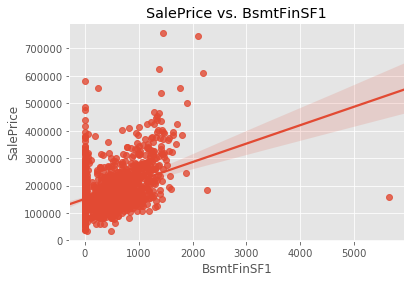

1
Axes(0.125,0.125;0.775x0.755)


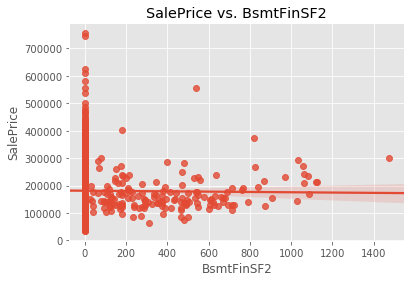

2
Axes(0.125,0.125;0.775x0.755)


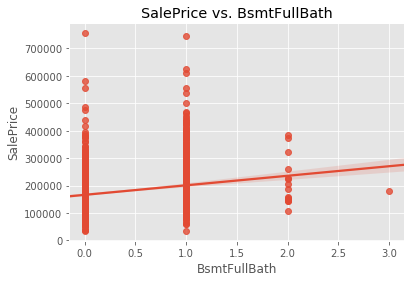

3
Axes(0.125,0.125;0.775x0.755)


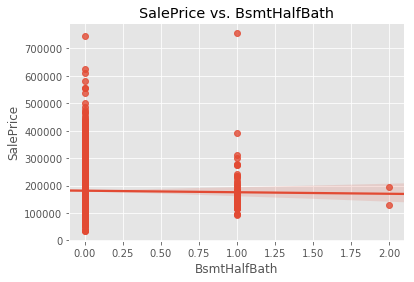

4
Axes(0.125,0.125;0.775x0.755)


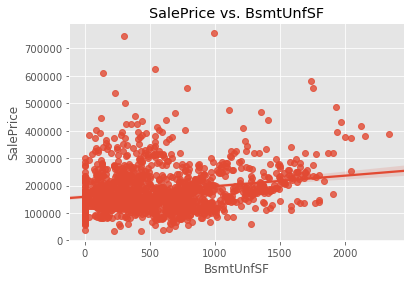

5
Axes(0.125,0.125;0.775x0.755)


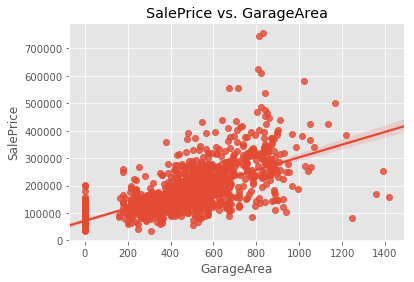

6
Axes(0.125,0.125;0.775x0.755)


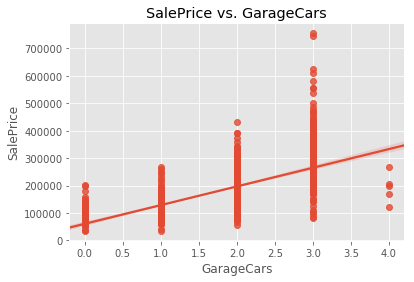

7
8
9
10
Axes(0.125,0.125;0.775x0.755)


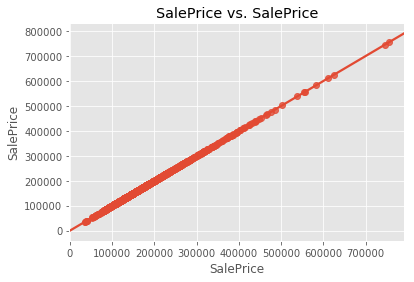

11
Axes(0.125,0.125;0.775x0.755)


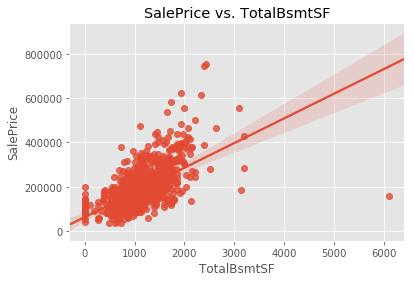

In [36]:
graph_relationships(floats)

Axes(0.125,0.125;0.775x0.755)


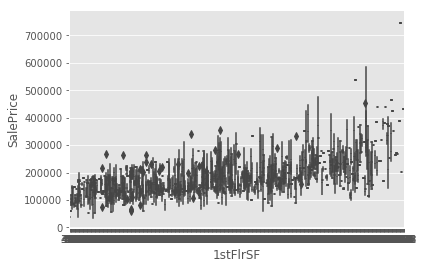

Axes(0.125,0.125;0.775x0.755)


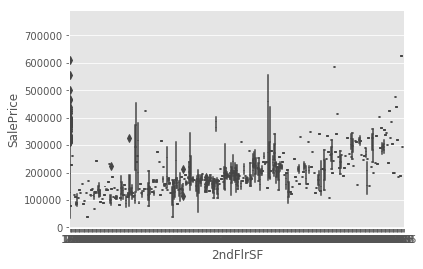

Axes(0.125,0.125;0.775x0.755)


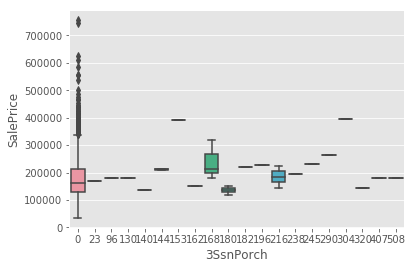

Axes(0.125,0.125;0.775x0.755)


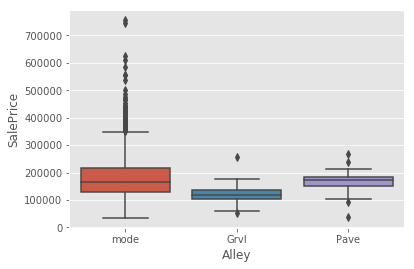

Axes(0.125,0.125;0.775x0.755)


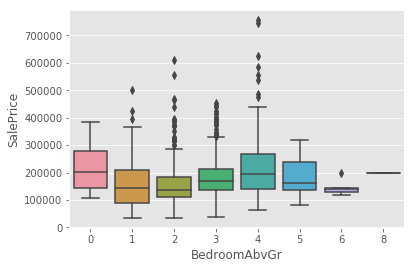

Axes(0.125,0.125;0.775x0.755)


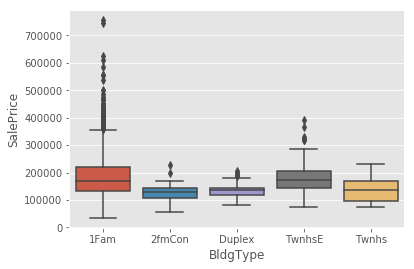

Axes(0.125,0.125;0.775x0.755)


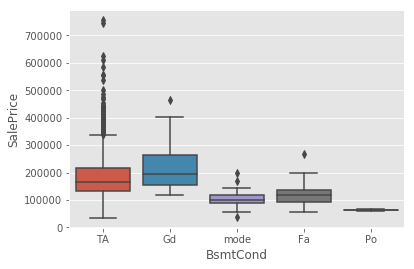

Axes(0.125,0.125;0.775x0.755)


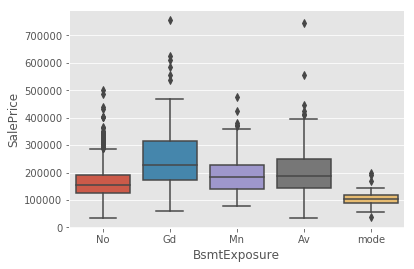

Axes(0.125,0.125;0.775x0.755)


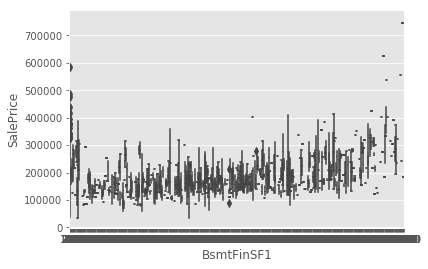

Axes(0.125,0.125;0.775x0.755)


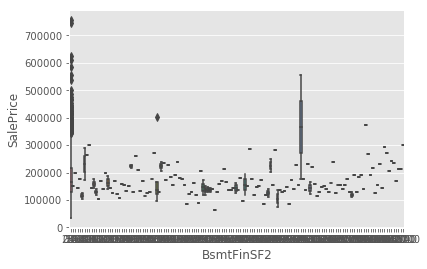

Axes(0.125,0.125;0.775x0.755)


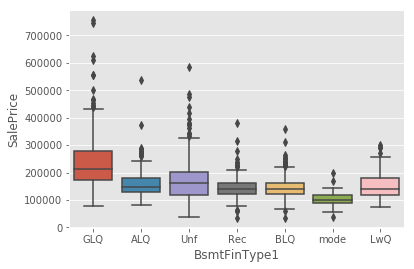

Axes(0.125,0.125;0.775x0.755)


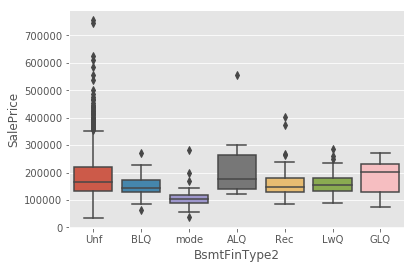

Axes(0.125,0.125;0.775x0.755)


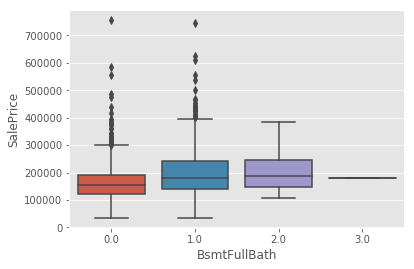

Axes(0.125,0.125;0.775x0.755)


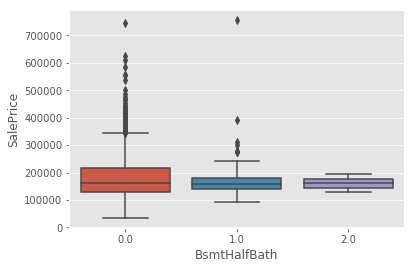

Axes(0.125,0.125;0.775x0.755)


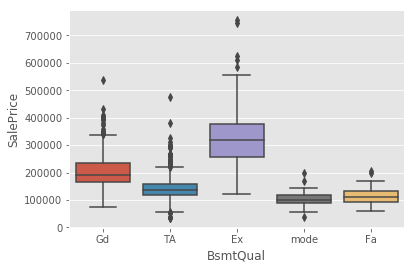

Axes(0.125,0.125;0.775x0.755)


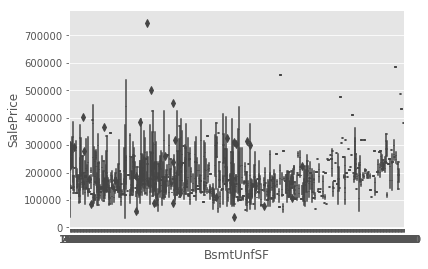

Axes(0.125,0.125;0.775x0.755)


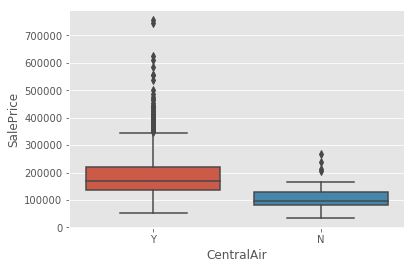

Axes(0.125,0.125;0.775x0.755)


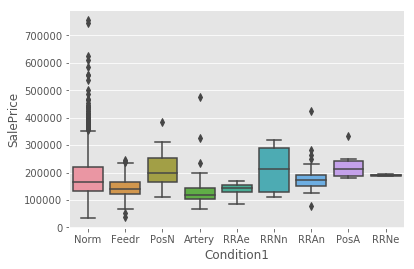

Axes(0.125,0.125;0.775x0.755)


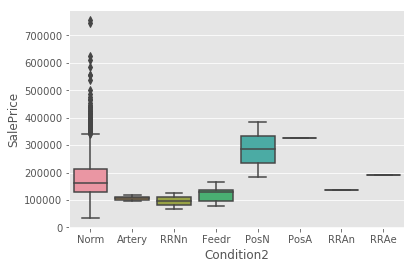

Axes(0.125,0.125;0.775x0.755)


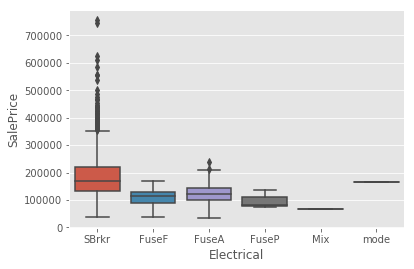

Axes(0.125,0.125;0.775x0.755)


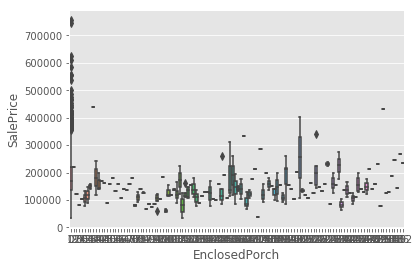

Axes(0.125,0.125;0.775x0.755)


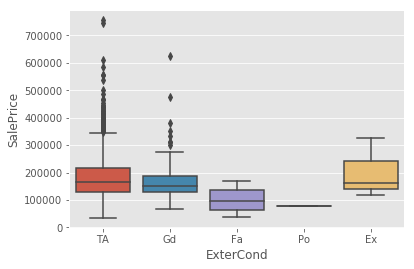

Axes(0.125,0.125;0.775x0.755)


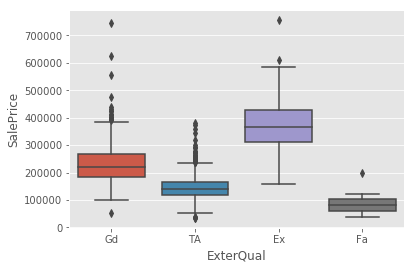

Axes(0.125,0.125;0.775x0.755)


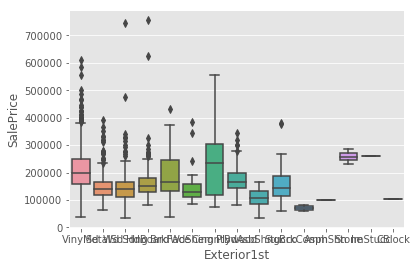

Axes(0.125,0.125;0.775x0.755)


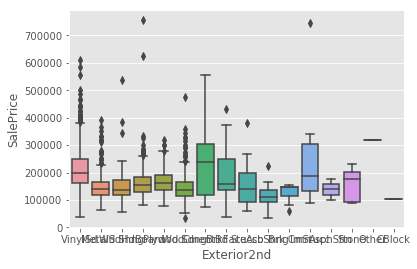

Axes(0.125,0.125;0.775x0.755)


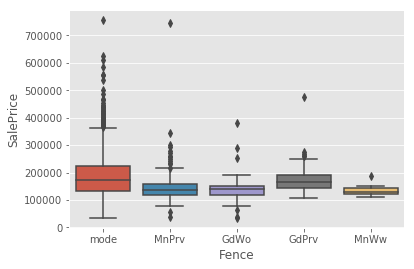

Axes(0.125,0.125;0.775x0.755)


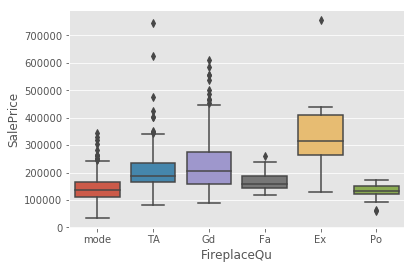

Axes(0.125,0.125;0.775x0.755)


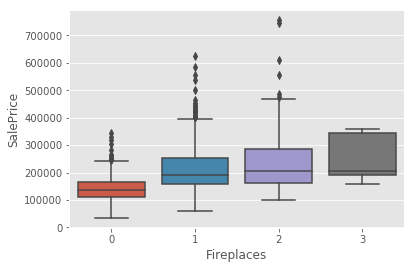

Axes(0.125,0.125;0.775x0.755)


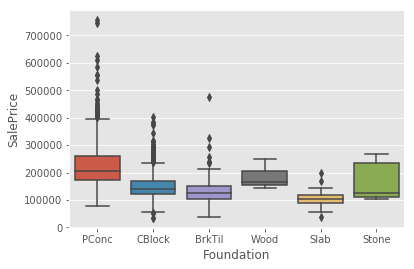

Axes(0.125,0.125;0.775x0.755)


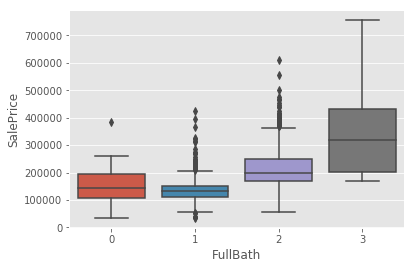

Axes(0.125,0.125;0.775x0.755)


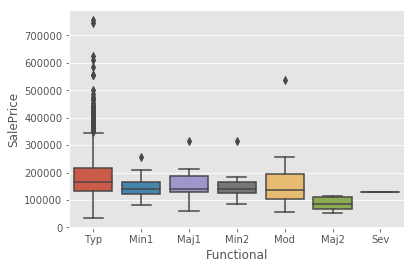

Axes(0.125,0.125;0.775x0.755)


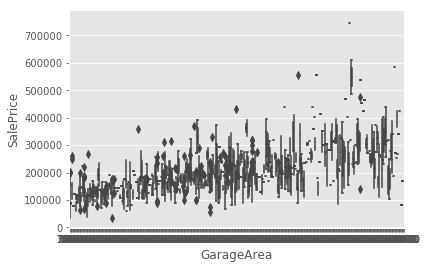

Axes(0.125,0.125;0.775x0.755)


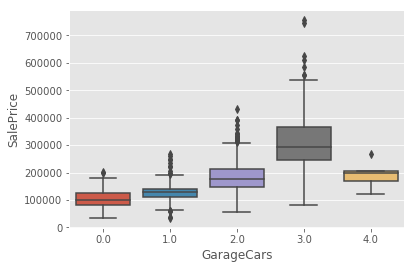

Axes(0.125,0.125;0.775x0.755)


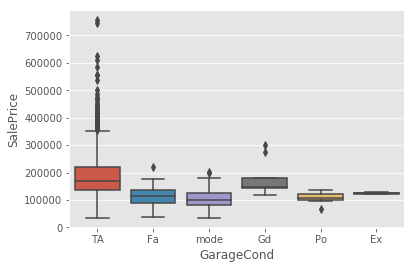

Axes(0.125,0.125;0.775x0.755)


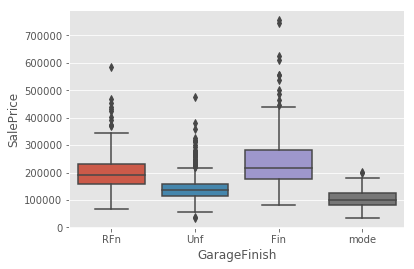

Axes(0.125,0.125;0.775x0.755)


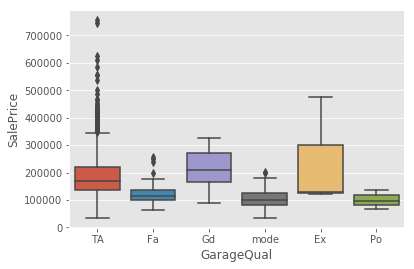

Axes(0.125,0.125;0.775x0.755)


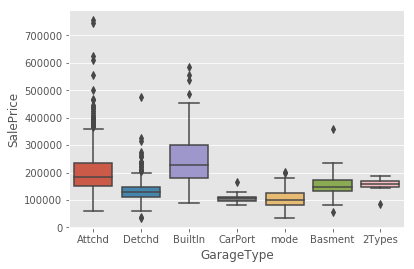

Axes(0.125,0.125;0.775x0.755)


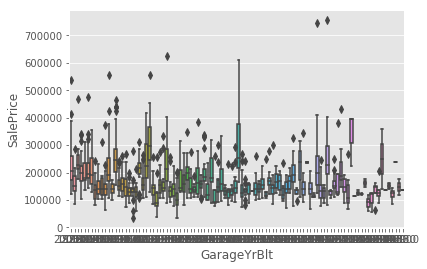

Axes(0.125,0.125;0.775x0.755)


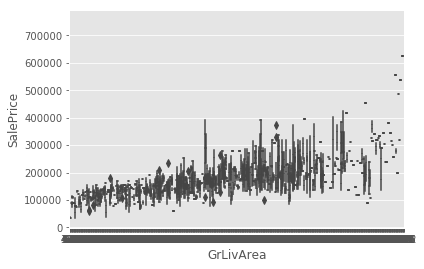

Axes(0.125,0.125;0.775x0.755)


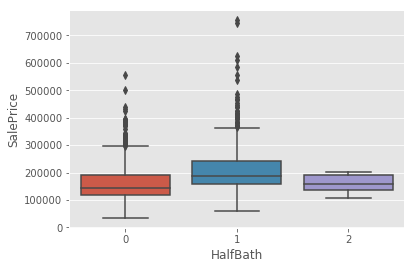

Axes(0.125,0.125;0.775x0.755)


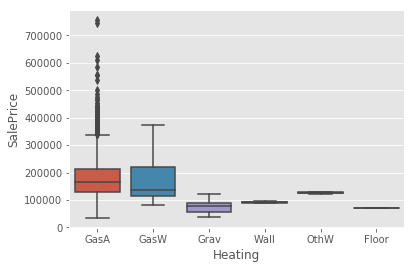

Axes(0.125,0.125;0.775x0.755)


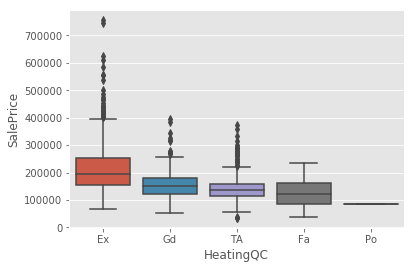

Axes(0.125,0.125;0.775x0.755)


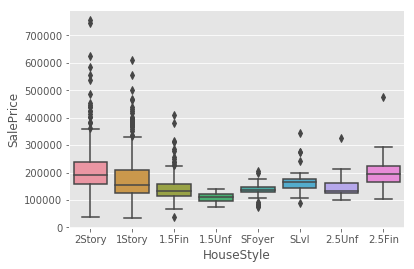

In [37]:
graph_relationships(categorical)

0
Axes(0.125,0.125;0.775x0.755)


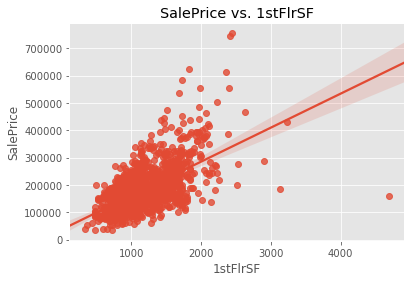

1
Axes(0.125,0.125;0.775x0.755)


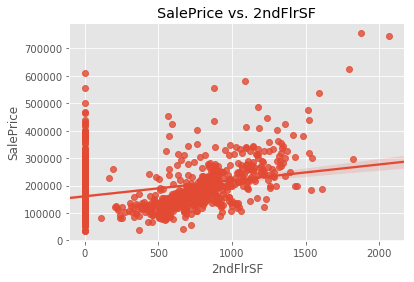

2
Axes(0.125,0.125;0.775x0.755)


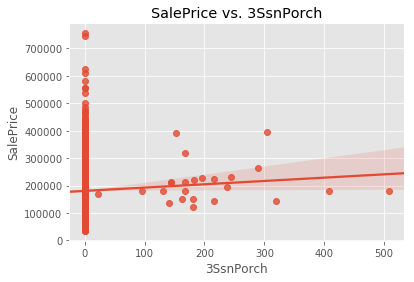

3
Axes(0.125,0.125;0.775x0.755)


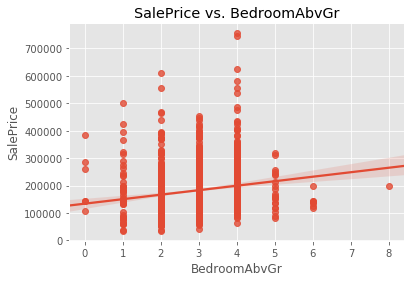

4
Axes(0.125,0.125;0.775x0.755)


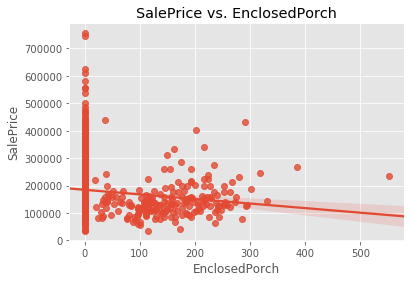

5
Axes(0.125,0.125;0.775x0.755)


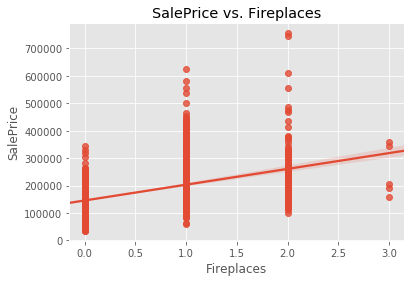

6
Axes(0.125,0.125;0.775x0.755)


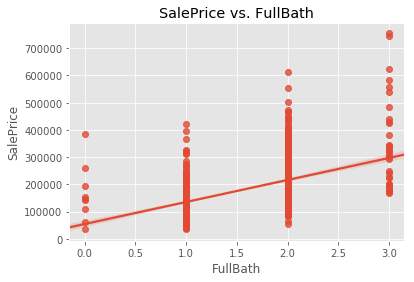

7
Axes(0.125,0.125;0.775x0.755)


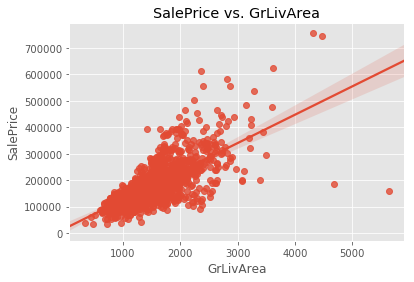

8
Axes(0.125,0.125;0.775x0.755)


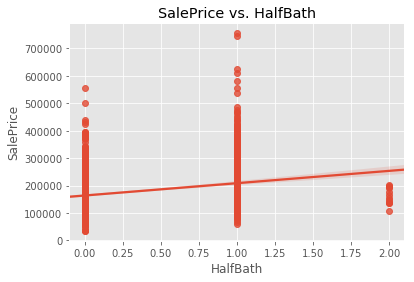

9
Axes(0.125,0.125;0.775x0.755)


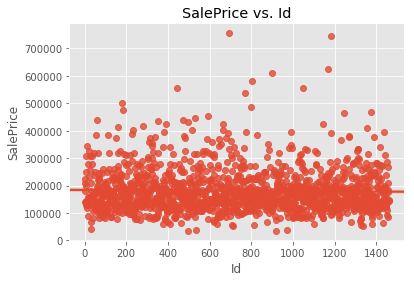

10
Axes(0.125,0.125;0.775x0.755)


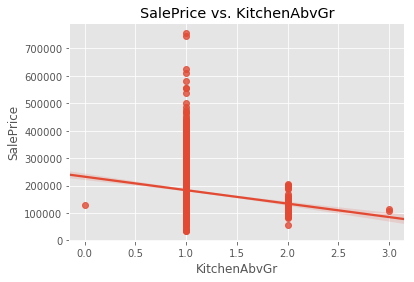

11
Axes(0.125,0.125;0.775x0.755)


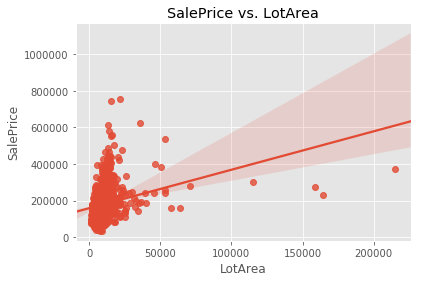

12
Axes(0.125,0.125;0.775x0.755)


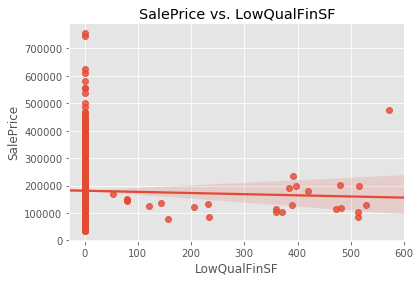

13
Axes(0.125,0.125;0.775x0.755)


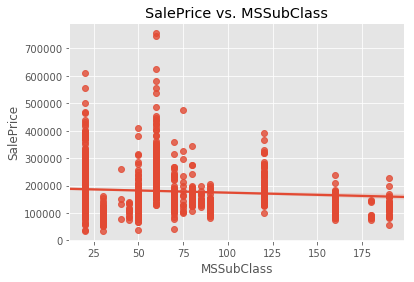

14
Axes(0.125,0.125;0.775x0.755)


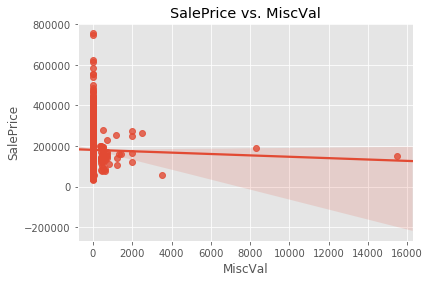

15
Axes(0.125,0.125;0.775x0.755)


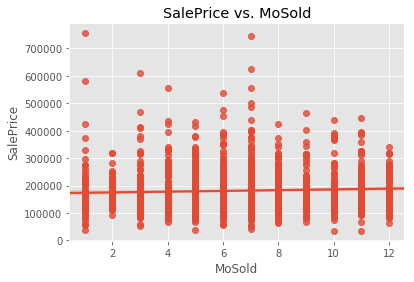

16
Axes(0.125,0.125;0.775x0.755)


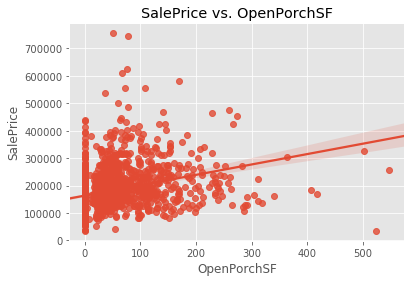

17
Axes(0.125,0.125;0.775x0.755)


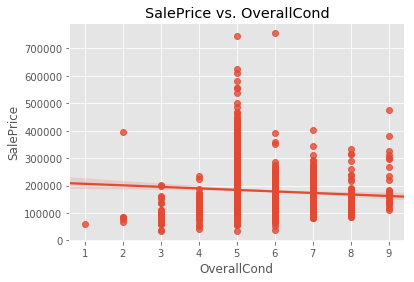

18
Axes(0.125,0.125;0.775x0.755)


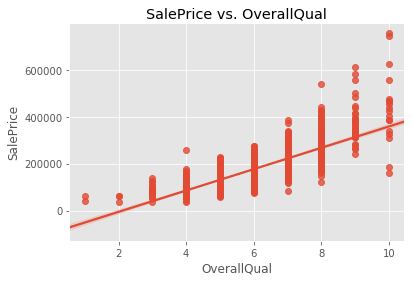

19
Axes(0.125,0.125;0.775x0.755)


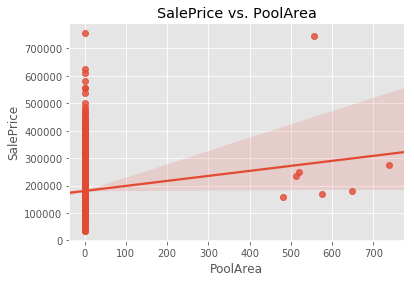

20
Axes(0.125,0.125;0.775x0.755)


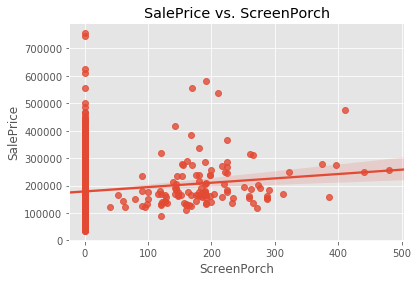

21
Axes(0.125,0.125;0.775x0.755)


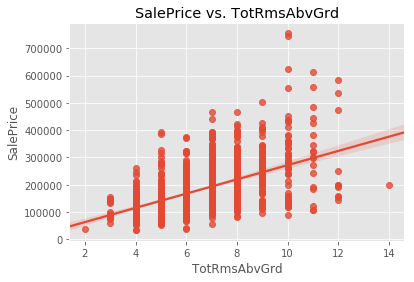

22
Axes(0.125,0.125;0.775x0.755)


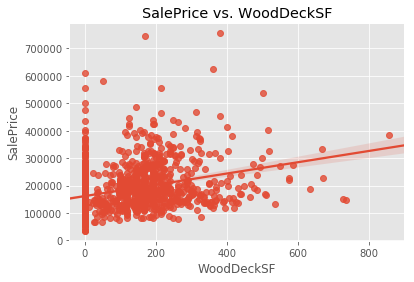

23
Axes(0.125,0.125;0.775x0.755)


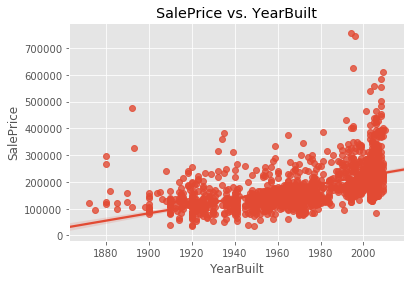

24
Axes(0.125,0.125;0.775x0.755)


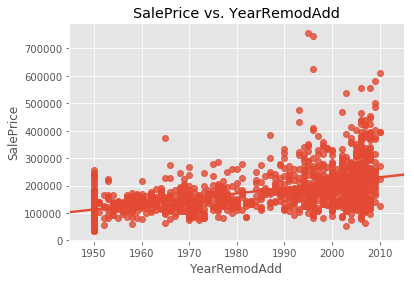

25
Axes(0.125,0.125;0.775x0.755)


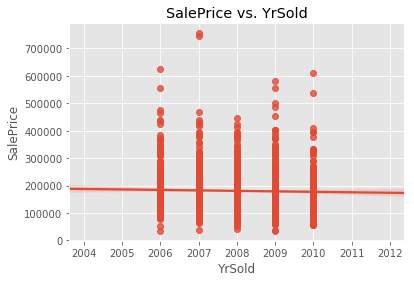

26
Axes(0.125,0.125;0.775x0.755)


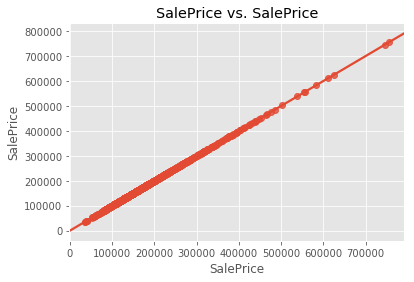

In [38]:
graph_relationships(ints)

# Feature Engineering

This section took a lot of creativity. I do not have much domain knowledge in regards to real estate, however, I did a lot of research on what features are important in houses. 

In [15]:
#New Features
combined["Total_SF"]=combined["TotalBsmtSF"]+combined['GrLivArea']+combined["GarageArea"]
combined["Grade"]=combined["OverallQual"]*combined["OverallCond"]
combined["FlrSF"]=combined["2ndFlrSF"]+combined["1stFlrSF"]

This cell adds in a feature for total square feet, house grade(another measure of quality) and square footage in a
house.

In [16]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series(["No"
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [17]:
trainerrr=combined.drop(columns=["SalePrice"])
combined_time = DataFrameImputer().fit_transform(trainerrr)

In [18]:
def log(trainer):
    " Converts all numeric columns onto a logarithmic scale"
    numeric_feats = trainer.dtypes[trainer.dtypes != "object"].index
    trainer[numeric_feats] = np.log1p(trainer[numeric_feats])
    return trainer

In [19]:
log_combined=log(combined_time)
Sale_Price=np.log1p(combined.SalePrice.dropna())

In [20]:
#Binning Neighborhoods Depending on average salesprice
print(combined.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False))
neighborhood={"NoRidge":4,"NridgHt":4,"StoneBr":4,"Timber":3,"Veenker":3,"Somerst":3,"ClearCr":3,"Crawfor":3,"CollgCr":2
             ,"Blmngtn":3,"Gilbert":3,"NWAmes":3,"SawyerW":3,"Mitchel":3,"NAmes":3,"NPkVill":2,"SWISU":2,"Blueste":2,
             "Sawyer":2,"OldTown":2,"Edwards":2,"BrkSide":2,"BrDale":1,"IDOTRR":1,"MeadowV":1,"No":1}
log_combined.Neighborhood=log_combined.Neighborhood.apply(func=lambda x:neighborhood[x])

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64


In [21]:
#Mapping out quality
Conditions={"No":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
#Transforming Columns
log_combined.BsmtQual=log_combined.BsmtQual.apply(func=lambda x:Conditions[x])
log_combined.BsmtCond=log_combined.BsmtCond.apply(func=lambda x:Conditions[x])
log_combined.GarageQual=log_combined.GarageQual.apply(func=lambda x:Conditions[x])
log_combined.GarageCond=log_combined.GarageCond.apply(func=lambda x:Conditions[x])
log_combined.ExterCond=log_combined.ExterCond.apply(func=lambda x:Conditions[x])
log_combined.ExterQual=log_combined.ExterQual.apply(func=lambda x:Conditions[x])
log_combined.HeatingQC=log_combined.HeatingQC.apply(func=lambda x:Conditions[x])
log_combined.KitchenQual=log_combined.KitchenQual.apply(func=lambda x:Conditions[x])
log_combined.FireplaceQu=log_combined.FireplaceQu.apply(func=lambda x:Conditions[x])
log_combined.PoolQC=log_combined.PoolQC.apply(func=lambda x:Conditions[x])

In [22]:
#Mapping out street,utilities, and garage
street={"Pave":2,"Grvl":1,"No":0}
utilities={"AllPub":2,"NoSeWa":1,"No":0}
Garage={"No":0,"Fin":2,"Unf":0,"RFn":1}
log_combined.Utilities=log_combined.Utilities.apply(func=lambda x:utilities[x])
log_combined.Street=log_combined.Street.apply(func=lambda x:street[x])
log_combined.GarageFinish=log_combined.GarageFinish.apply(func=lambda x:Garage[x])

In [23]:
#Adding in two interaction terms
log_combined["HQ_N"]=log_combined.Neighborhood*log_combined.Total_SF
log_combined["HQ_NN"]=log_combined.Neighborhood*log_combined.OverallQual

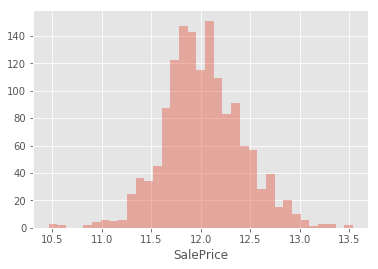

In [24]:
#Distribution of Log-Transformed SalePrice
sns.distplot(Sale_Price,kde=False)

In [25]:
#What values are most highly correlated with SalePrice
combined.corr(method="spearman").SalePrice.sort_values(ascending=False).head(n=10)

SalePrice      1.000000
Total_SF       0.844269
OverallQual    0.809829
FlrSF          0.738046
GrLivArea      0.731310
GarageCars     0.690711
YearBuilt      0.652682
GarageArea     0.649379
FullBath       0.635957
TotalBsmtSF    0.602725
Name: SalePrice, dtype: float64

In [26]:
#What values are most negatively correlated with SalePrice
combined.corr(method="spearman").SalePrice.sort_values(ascending=False).tail(n=10)

MSSubClass       0.007192
BsmtHalfBath    -0.012189
Id              -0.018546
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePrice, dtype: float64

# Fitting the models

In [27]:
#Splitting into training and testing samples
log_combined=pd.get_dummies(log_combined)
test=log_combined.iloc[1460:,:]
train=log_combined.iloc[:1460,:]
Y=Sale_Price
Y=Y.reshape((1460,1))
#Train/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(train, Y, test_size=0.3, random_state=42)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


## Attempting Feature Selection with Random Forests
### I chose features depending on their importance within a Random Forests Model

In [28]:
# Create a random forest classifier
rf = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the classifier
rf.fit(X_train, Y_train)
feat_labels=list(X_train)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [29]:
#Most important Variables
most_important=sorted(zip(feat_labels,rf.feature_importances_),key= lambda x:x[1],reverse=True)[:15]

In [30]:
variables=[feature for feature,number in most_important]

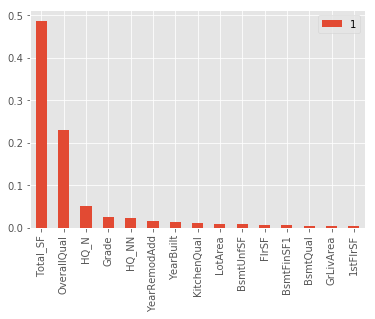

In [31]:
#Printing 15 most important variables with Random Forest
pd.DataFrame(most_important,index=variables).plot(kind="bar")

## I ended up not using the results from this feature selection technique.

## Xgboost

In [32]:
#Listing out params in algorithm
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)
params = {  
    "n_estimators": st.randint(20, 300),
    "max_depth": st.randint(3, 12),
    "learning_rate": st.uniform(0.1, 0.9),
    "gamma": st.uniform(0, 10),
      'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
      "colsample_bytree": one_to_left,
    "subsample": one_to_left    
}

In [33]:
#Using RandomizedSearchCV to find the best parameters
xgb = xgboost.XGBRegressor(nthread=-1)
gs = RandomizedSearchCV(xgb,params,cv=10,n_iter=15,scoring='neg_mean_squared_error')  
gs.fit(X_train,Y_train)
print(gs.best_params_)  
#finding the MSE
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(Y_test,gs.predict(X_test))))
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(Y_train,gs.predict(X_train))))
print(r2_score(Y_test,gs.predict(X_test)))
print (gs.score(X_train, Y_train))

{'colsample_bytree': 0.993897908306939, 'gamma': 0.6520737339457794, 'learning_rate': 0.3854429348738727, 'max_depth': 8, 'min_child_weight': 3.9718065208270183, 'n_estimators': 282, 'reg_alpha': 1.6261187994290212, 'subsample': 0.9009838661331749}
Root Mean squared error: 0.16
Root Mean squared error: 0.15
0.8513448716274734
-0.02134614756441883


### Lasso, Ridge and ElasticNet Regression

In [39]:
# Best Lasso with MSE printed out
model=Lasso(alpha=2.20e-4)
model.fit(X_train,Y_train)
predict_lasso=model.predict(X_test)
print(math.sqrt(mean_squared_error((Y_test),model.predict(X_test))))
predict=np.ravel(predict_lasso)


0.1179794199216035


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [42]:
# Best Elasticnet with MSE printed out
model=ElasticNet(alpha=3.25e-04)
model.fit(X_train,Y_train)
predict_elastic=model.predict(X_test)
print(math.sqrt(mean_squared_error((Y_test),predict_elastic)))


0.11861812792435772


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [41]:
#Best Ridge with MSE printed out
model=Ridge(alpha=1)
model.fit(X_train,Y_train)
print(math.sqrt(mean_squared_error((Y_test),model.predict(X_test))))

0.12486484921793521


## Conclusion: After countless tweaking, I have discovered that Lasso Regression gives me the best results. Although I certainly would have liked better results, this is not bad for my first Kaggle Comp.


## Future Work: Regression is an expansive field. There are a multitude of ways to approach a regression problem. For future projects, perhaps I can chose different machine learning algorithms to output regressions. Supplementary, I could experiment with different feature selection techniques.

# Generating my prediction

In [ ]:
my_submission=pd.DataFrame()
my_submission = pd.DataFrame({'SalePrice': pd.Series(np.exp(predict))})


In [ ]:
my_submission.index=range(1461,1461+1459)

In [ ]:
my_submission.to_csv("my_model.csv")